<a href="https://colab.research.google.com/github/1maduddin/Bisa-ai-data-science/blob/main/Final_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df['age'].min()

18

In [ ]:
df['age'].max()

64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#mapping categorical value
#sex Male = 0; Female = 1 

df['sex'] = df['sex'].map({'male':0, 'female': 1})

In [ ]:
#mapping categorical value
#smoker = 1; non-smoker = 0 
df['smoker'] = df['smoker'].map({'no':0, 'yes': 1})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#identify continous and categorical variables

#Binning the age column.
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']

df['Age_range']=pd.cut(df['age'],bins=bins,labels=slots)

df.head()

,age,sex,bmi,children,smoker,region,charges,Age_range
0,19,1,27.900,0,1,southwest,16884.92400,Young adult
1,18,0,33.770,1,0,southeast,1725.55230,Young adult
2,28,0,33.000,3,0,southeast,4449.46200,Young adult
3,33,0,22.705,0,0,northwest,21984.47061,Young adult
4,32,0,28.880,0,0,northwest,3866.85520,Young adult


In [ ]:
# I can check the number of unique values is a column
# If the number of unique values low: Categorical column
# If the number of unique values in a columns high: Continuous

df.nunique().sort_values()


sex             2
smoker          2
Age_range       3
region          4
children        6
age            47
bmi           548
charges      1337
dtype: int64

In [ ]:
#Visualising Numeric or continous Variables

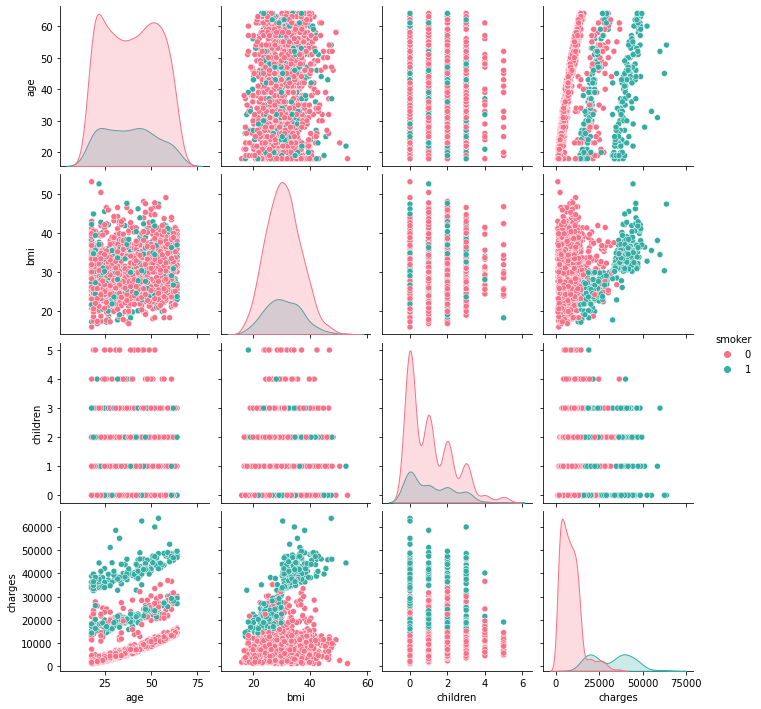

In [ ]:
##Pairplot of all numerical variables
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

%matplotlib inline

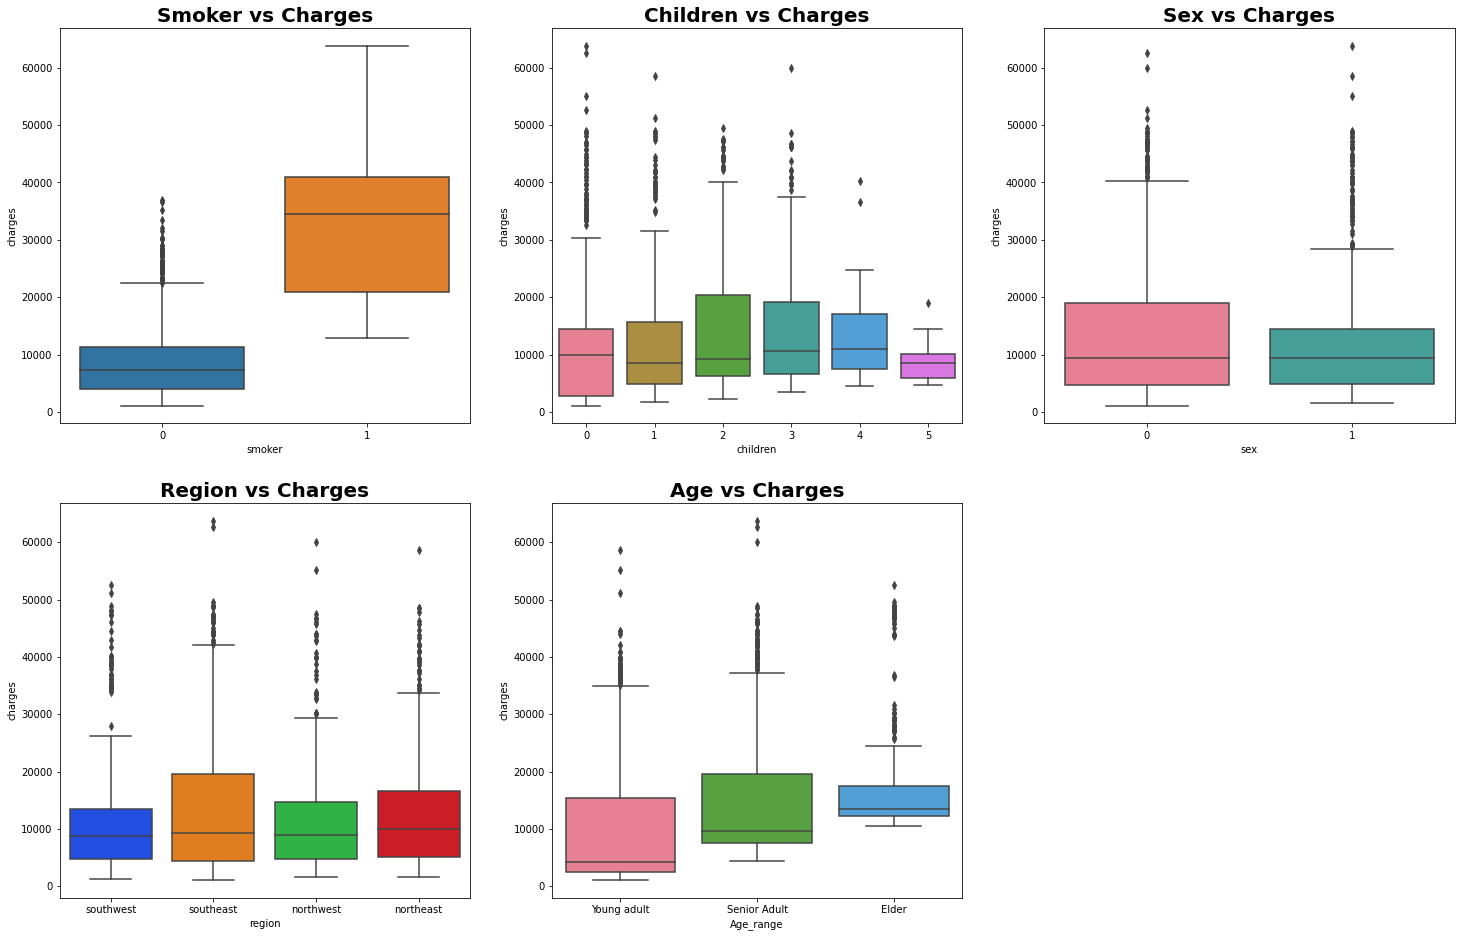

In [ ]:
#Visualising categorical Variables
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = df, palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = df, palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age_range', y = 'charges', data = df, palette= 'husl')
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()

%matplotlib inline

In [ ]:
#From the plot above we can see that.
#1. Medical Charges are more for smoker than the non smoker.
#2. Medical Charges are more in Southeast Region
#3. Senior Adults are charged more

In [ ]:
#Taking into account certain factors (sex, smoking, having children),
#let's see how it changes by region

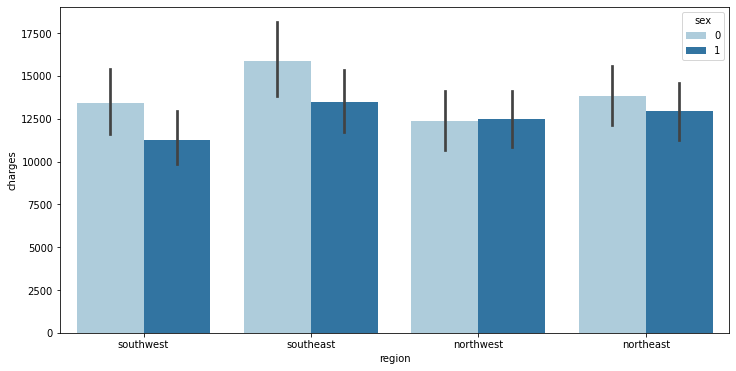

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Paired')
plt.show()

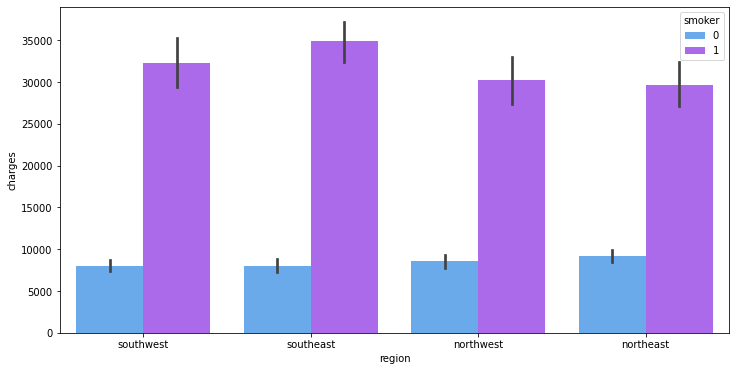

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='cool')
plt.show()

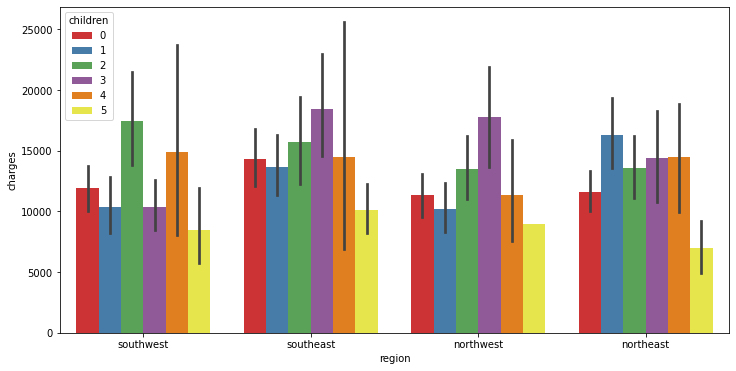

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data= df, palette='Set1')
plt.show()

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well


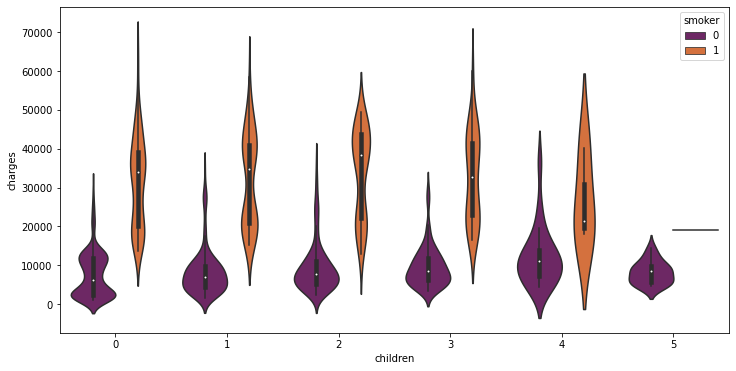

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='inferno')
plt.show()

From above plot we can see that, Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less


In [ ]:
#heatmap

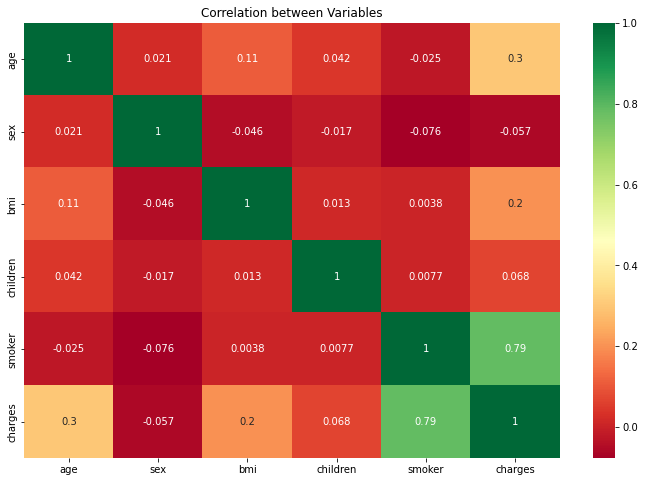

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [ ]:
# Data Preparation

df.head()

,age,sex,bmi,children,smoker,region,charges,Age_range
0,19,1,27.900,0,1,southwest,16884.92400,Young adult
1,18,0,33.770,1,0,southeast,1725.55230,Young adult
2,28,0,33.000,3,0,southeast,4449.46200,Young adult
3,33,0,22.705,0,0,northwest,21984.47061,Young adult
4,32,0,28.880,0,0,northwest,3866.85520,Young adult


In [ ]:
# # Get the dummy variables for region and age range
region=pd.get_dummies(df.region,drop_first=True)
Age_range=pd.get_dummies(df.Age_range,drop_first=True)
children= pd.get_dummies(df.children,drop_first=True,prefix='children')

In [ ]:
# Add the results to the original bike dataframe
df=pd.concat([region,Age_range,children,df],axis=1)
df.head()

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,age,sex,bmi,children,smoker,region,charges,Age_range
0,0,0,1,0,0,0,0,0,0,0,19,1,27.900,0,1,southwest,16884.92400,Young adult
1,0,1,0,0,0,1,0,0,0,0,18,0,33.770,1,0,southeast,1725.55230,Young adult
2,0,1,0,0,0,0,0,1,0,0,28,0,33.000,3,0,southeast,4449.46200,Young adult
3,1,0,0,0,0,0,0,0,0,0,33,0,22.705,0,0,northwest,21984.47061,Young adult
4,1,0,0,0,0,0,0,0,0,0,32,0,28.880,0,0,northwest,3866.85520,Young adult


In [ ]:
#Drop region and age range as we are created a dummy
df.drop(['region', 'Age_range', 'age','children'], axis = 1, inplace = True)
df.head()

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker,charges
0,0,0,1,0,0,0,0,0,0,0,1,27.900,1,16884.92400
1,0,1,0,0,0,1,0,0,0,0,0,33.770,0,1725.55230
2,0,1,0,0,0,0,0,1,0,0,0,33.000,0,4449.46200
3,1,0,0,0,0,0,0,0,0,0,0,22.705,0,21984.47061
4,1,0,0,0,0,0,0,0,0,0,0,28.880,0,3866.85520


In [ ]:
# Now lets see the number of rows and columns
df.shape

(1338, 14)

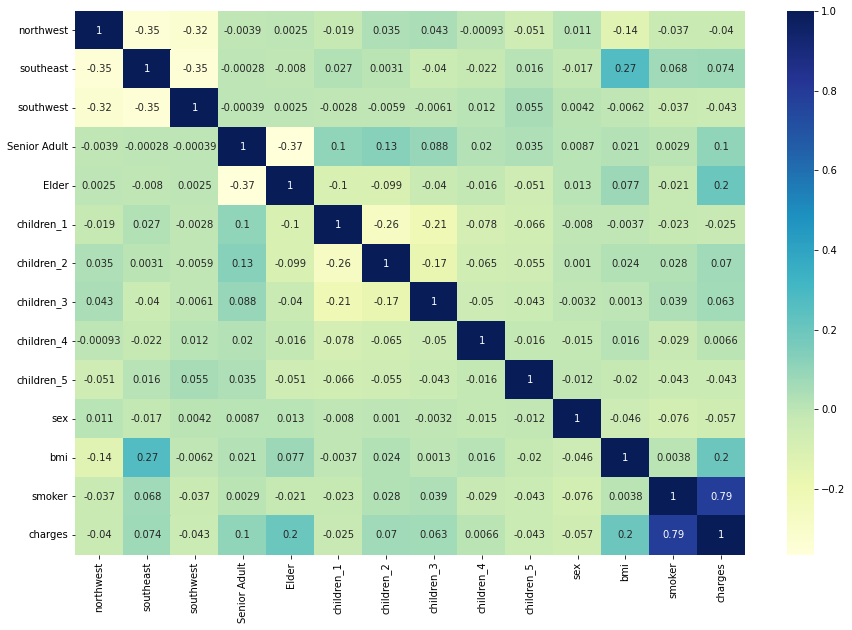

In [ ]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder #Untuk mengubah data kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #Untuk pemisahan data
from sklearn.ensemble import RandomForestRegressor #Model RandomForest
from sklearn.linear_model import LinearRegression #Model Logistic Regression
from sklearn.tree import DecisionTreeRegressor #Model Decision Tree
from sklearn.metrics import mean_squared_error #Untuk evaluasi performa model
from sklearn.metrics import mean_absolute_error #Untuk evaluasi performa model
from sklearn.metrics import r2_score #Untuk evaluasi performa model

In [ ]:
#Defined X value and y value 

X = df.drop(['charges'],axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 1204
No. of testing examples: 134


In [ ]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1204, 13)
X Test :  (134, 13)
Y Train :  (1204,)
Y Test :  (134,)


In [ ]:
X_train.head(2)

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker
461,0,0,1,1,0,0,0,0,0,0,0,30.0,1
322,0,0,1,0,0,0,0,0,0,0,0,30.8,1


In [ ]:
y_train.head(2)

461    22144.032
322    35491.640
Name: charges, dtype: float64

In [ ]:
#linear_regression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_score = lr.score(X_test, y_test)
lr_score

0.8171986268161946

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 9226.16986257  8891.38601201 38002.4480232  16042.84946264
  4627.42866334]
[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]


In [ ]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(lr_mse))
print('Nilai Root Mean Squared Error = {}'.format(lr_rmse))
print('Nilai Mean Absolute Error     = {}'.format(lr_mae))
print('Nilai R2                      = {}'.format(lr_r))

Nilai Mean Squared Error      = 35445816.17235432
Nilai Root Mean Squared Error = 5953.638901743565
Nilai Mean Absolute Error     = 4489.186771692852
Nilai R2                      = 0.8171986268161946


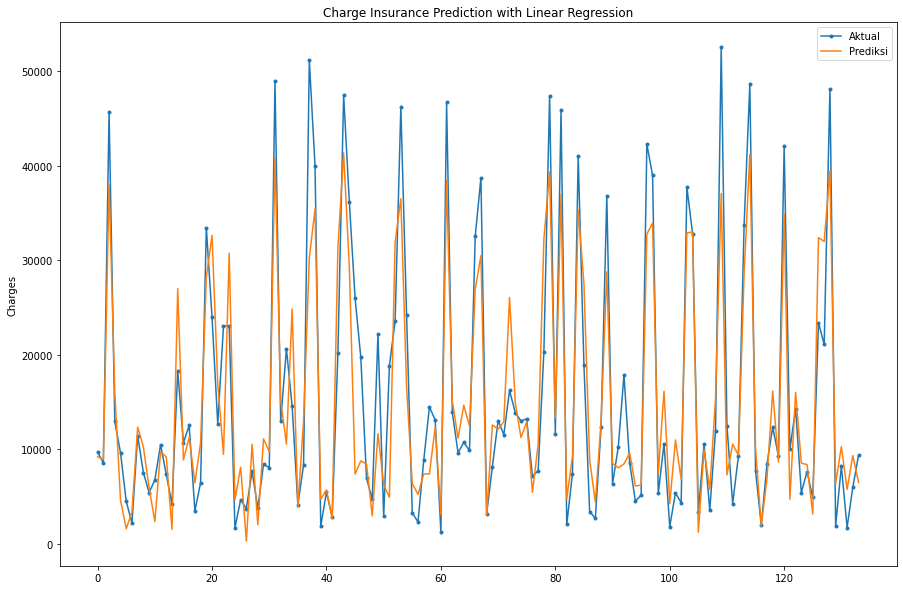

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Charges')
plt.title('Charge Insurance Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = y_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression
0,9724.53000,9226.0
1,8547.69130,8891.0
2,45702.02235,38002.0
3,12950.07120,16043.0


In [ ]:
##DecisionTree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_score = dt.score(X_test, y_test)
dt_score

0.7940261216828788

In [ ]:
y_pred = dt.predict(X_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 8968.33     5974.3847  48549.17835 14410.9321   6933.24225]
[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]


In [ ]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(dt_mse))
print('Nilai Root Mean Squared Error = {}'.format(dt_rmse))
print('Nilai Mean Absolute Error     = {}'.format(dt_mae))
print('Nilai R2                      = {}'.format(dt_r))

Nilai Mean Squared Error      = 39939044.76742932
Nilai Root Mean Squared Error = 6319.734548810521
Nilai Mean Absolute Error     = 3872.3895006343287
Nilai R2                      = 0.7940261216828788


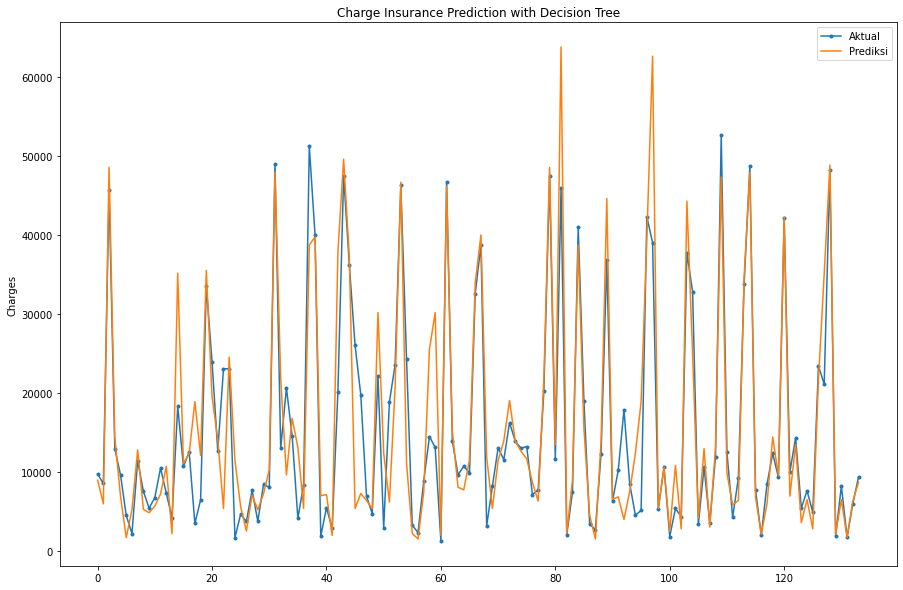

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Charges')
plt.title('Charge Insurance Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['DecisionTree'] = y_pred.flatten()
hasil_prediksi['DecisionTree'] = hasil_prediksi['DecisionTree'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree
0,9724.53000,9226.0,8968.0
1,8547.69130,8891.0,5974.0
2,45702.02235,38002.0,48549.0
3,12950.07120,16043.0,14411.0


In [ ]:
##RandomForest


In [ ]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
rf_score = rf.score(X_test, y_test)
rf_score

0.8899132920549042

In [ ]:
y_pred = rf.predict(X_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 8482.9424484   7613.18840676 45997.74132469 13891.76582991
  8007.05743245]
[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]


In [ ]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(rf_mse))
print('Nilai Root Mean Squared Error = {}'.format(rf_rmse))
print('Nilai Mean Absolute Error     = {}'.format(rf_mae))
print('Nilai R2                      = {}'.format(rf_r))

Nilai Mean Squared Error      = 21346192.016391356
Nilai Root Mean Squared Error = 4620.193937097376
Nilai Mean Absolute Error     = 2924.399490202295
Nilai R2                      = 0.8899132920549042


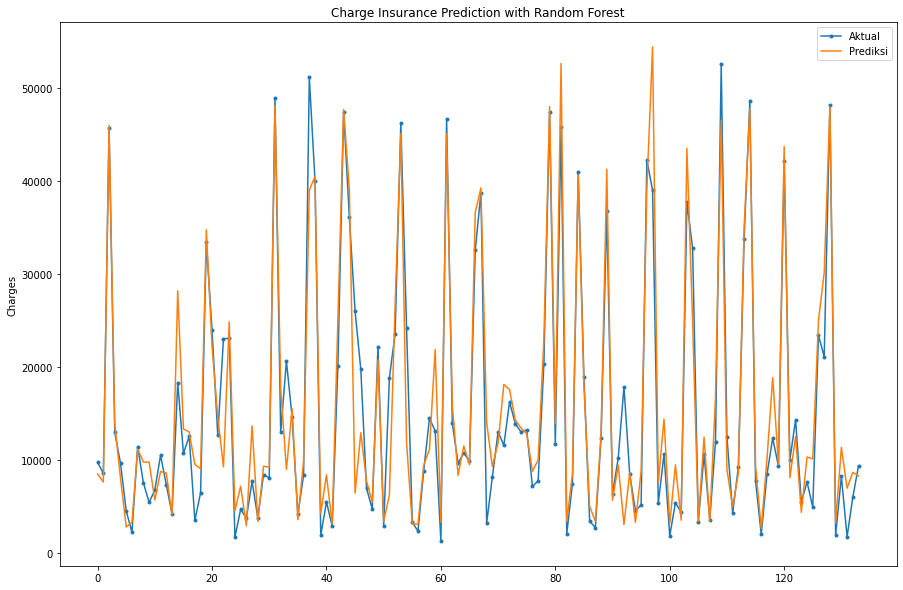

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Charges')
plt.title('Charge Insurance Prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['RandomForest'] = y_pred.flatten()
hasil_prediksi['RandomForest'] = hasil_prediksi['RandomForest'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree,RandomForest
0,9724.53000,9226.0,8968.0,8483.0
1,8547.69130,8891.0,5974.0,7613.0
2,45702.02235,38002.0,48549.0,45998.0
3,12950.07120,16043.0,14411.0,13892.0


In [ ]:
##Deep Neural Network (DNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape

(1204, 13)

In [ ]:
model = Sequential()
model.add(Dense(1204, input_shape=(None,13)))
model.add(Dense(1204, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, 1204)        16856     
                                                                 
 dense_10 (Dense)            (None, None, 1204)        1450820   
                                                                 
 dropout_3 (Dropout)         (None, None, 1204)        0         
                                                                 
 dense_11 (Dense)            (None, None, 1)           1205      
                                                                 
Total params: 1,468,881
Trainable params: 1,468,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
38/38 [==============================] - 1s 21ms/step - loss: 286031712.0000
Epoch 2/200
38/38 [==============================] - 1s 20ms/step - loss: 165673696.0000
Epoch 3/200
38/38 [==============================] - 1s 20ms/step - loss: 133213552.0000
Epoch 4/200
38/38 [==============================] - 1s 19ms/step - loss: 131254432.0000
Epoch 5/200
38/38 [==============================] - 1s 20ms/step - loss: 129913608.0000
Epoch 6/200
38/38 [==============================] - 1s 19ms/step - loss: 127826376.0000
Epoch 7/200
38/38 [==============================] - 1s 20ms/step - loss: 126372952.0000
Epoch 8/200
38/38 [==============================] - 1s 20ms/step - loss: 124254584.0000
Epoch 9/200
38/38 [==============================] - 1s 19ms/step - loss: 122690688.0000
Epoch 10/200
38/38 [==============================] - 1s 20ms/step - loss: 119702904.0000
Epoch 11/200
38/38 [==============================] - 1s 20ms/step - loss: 116192224.0000
Epoch 12/200
38/38 

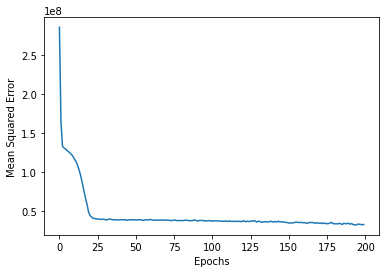

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

(134, 1)

In [ ]:
print(y_pred[:5].flatten())
print(y_test[:5].values.flatten())

[ 9341.743  9724.475 41020.547 14945.22   6769.448]
[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525 ]


In [ ]:
dnn_mse = mean_squared_error(y_test.values, y_pred)
dnn_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dnn_mae = mean_absolute_error(y_test.values, y_pred)
dnn_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(dnn_mse))
print('Nilai Root Mean Squared Error = {}'.format(dnn_rmse))
print('Nilai Mean Absolute Error     = {}'.format(dnn_mae))
print('Nilai R2                      = {}'.format(dnn_r))

Nilai Mean Squared Error      = 26541301.46047343
Nilai Root Mean Squared Error = 5151.82506112867
Nilai Mean Absolute Error     = 3672.8099542481923
Nilai R2                      = 0.8631210428483801


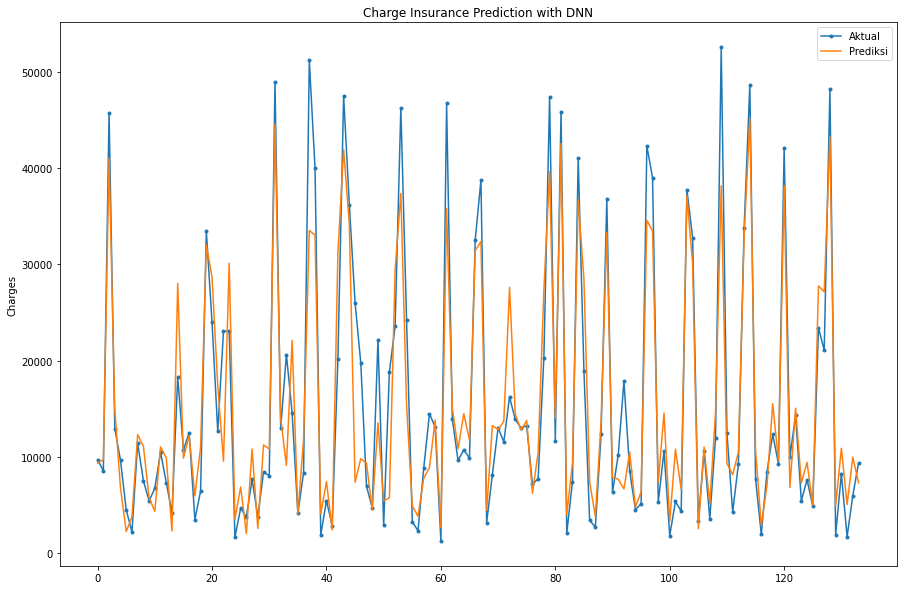

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Charges')
plt.title('Charge Insurance Prediction with DNN')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['DNN'] = y_pred.flatten()
hasil_prediksi['DNN'] = hasil_prediksi['DNN'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree,RandomForest,DNN
0,9724.53000,9226.0,8968.0,8483.0,9342.0
1,8547.69130,8891.0,5974.0,7613.0,9724.0
2,45702.02235,38002.0,48549.0,45998.0,41021.0
3,12950.07120,16043.0,14411.0,13892.0,14945.0


In [ ]:
#perbandingan
print('Nilai MSE LinearRegression  = {}'.format(lr_mse))
print('Nilai MSE DecisionTree      = {}'.format(dt_mse))
print('Nilai MSE RandomForest      = {}'.format(rf_mse))
print('Nilai MSE DNN               = {}'.format(dnn_mse))
print('========================================================')
print('Nilai RMSE LinearRegression = {}'.format(lr_rmse))
print('Nilai RMSE DecisionTree     = {}'.format(dt_rmse))
print('Nilai RMSE RandomForest     = {}'.format(rf_rmse))
print('Nilai RMSE DNN              = {}'.format(dnn_rmse))
print('========================================================')
print('Nilai MAE LinearRegression  = {}'.format(lr_mae))
print('Nilai MAE DecisionTree      = {}'.format(dt_mae))
print('Nilai MAE RandomForest      = {}'.format(rf_mae))
print('Nilai MAE DNN               = {}'.format(dnn_mae))
print('========================================================')
print('Nilai R2 Linear Regression  = {}'.format(lr_r))
print('Nilai R2 DecisionTree       = {}'.format(dt_r))
print('Nilai R2 RandomForest       = {}'.format(rf_r))
print('Nilai R2 DNN                = {}'.format(dnn_r))

Nilai MSE LinearRegression  = 35445816.17235432
Nilai MSE DecisionTree      = 39939044.76742932
Nilai MSE RandomForest      = 21346192.016391356
Nilai MSE DNN               = 26541301.46047343
Nilai RMSE LinearRegression = 5953.638901743565
Nilai RMSE DecisionTree     = 6319.734548810521
Nilai RMSE RandomForest     = 4620.193937097376
Nilai RMSE DNN              = 5151.82506112867
Nilai MAE LinearRegression  = 4489.186771692852
Nilai MAE DecisionTree      = 3872.3895006343287
Nilai MAE RandomForest      = 2924.399490202295
Nilai MAE DNN               = 3672.8099542481923
Nilai R2 Linear Regression  = 0.8171986268161946
Nilai R2 DecisionTree       = 0.7940261216828788
Nilai R2 RandomForest       = 0.8899132920549042
Nilai R2 DNN                = 0.8631210428483801


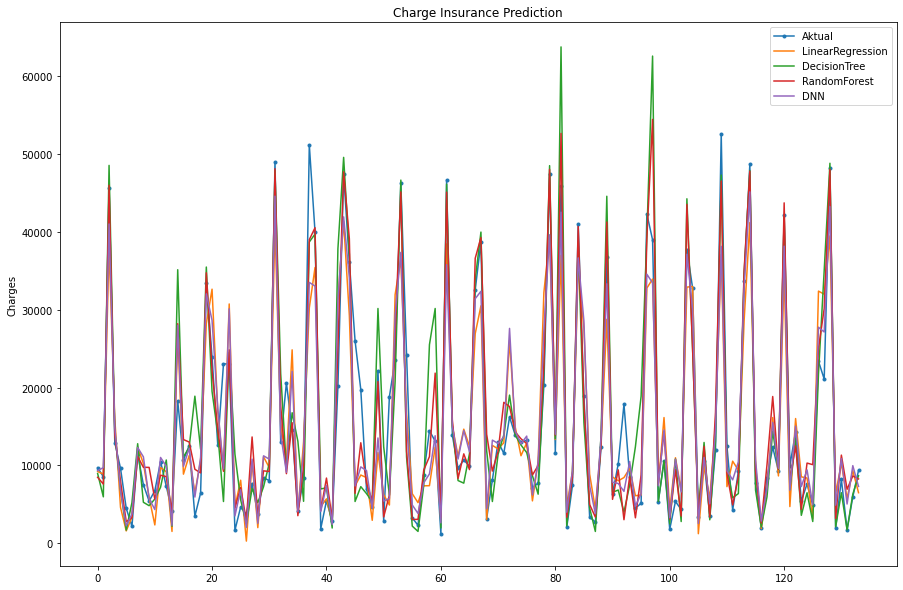

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), hasil_prediksi['Linear Regression'], label="LinearRegression")
plt.plot(range(len(y_test)), hasil_prediksi['DecisionTree'], label="DecisionTree")
plt.plot(range(len(y_test)), hasil_prediksi['RandomForest'], label="RandomForest")
plt.plot(range(len(y_test)), hasil_prediksi['DNN'], label="DNN")
plt.ylabel('Charges')
plt.title('Charge Insurance Prediction')
plt.legend()
plt.show()

In [ ]:
#Output Hasil

hasil_prediksi.to_csv('Hasil Prediksi.csv',index=False)

In [ ]:
hasil_prediksi

,Aktual,Linear Regression,DecisionTree,RandomForest,DNN
0,9724.53000,9226.0,8968.0,8483.0,9342.0
1,8547.69130,8891.0,5974.0,7613.0,9724.0
2,45702.02235,38002.0,48549.0,45998.0,41021.0
3,12950.07120,16043.0,14411.0,13892.0,14945.0
4,9644.25250,4627.0,6933.0,8007.0,6769.0
...,...,...,...,...,...
129,1917.31840,6384.0,2137.0,3184.0,4903.0
130,8219.20390,10288.0,6500.0,11333.0,10893.0
131,1725.55230,5755.0,1728.0,6948.0,5051.0
132,5976.83110,9340.0,6314.0,8655.0,9980.0
